In [7]:
import os
import matplotlib.colors as colors
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json 
import tikzplotlib as tpl
import numpy as np
import math
from scipy.optimize import curve_fit

color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [8]:
jet_chi_Re_acc = json.load(open("data/DJ_chi_Re_err_11.json"))
random_chi_Re_acc = json.load(open("data/DT_chi_Re_err_11.json"))
jet_chi_Re_acc_10 = json.load(open("data/DJ_chi_Re_err_10.json"))
random_chi_Re_acc_10 = json.load(open("data/DT_chi_Re_err_10.json"))

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/2579944522.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/2579944522.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})


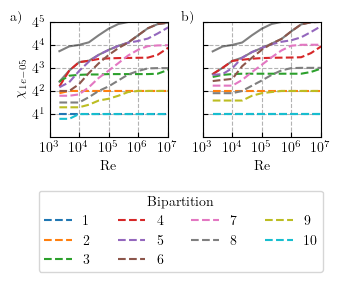

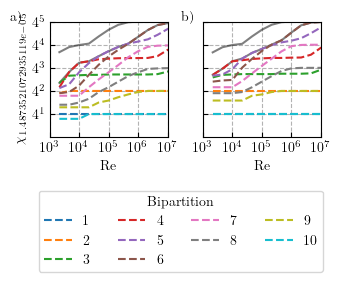

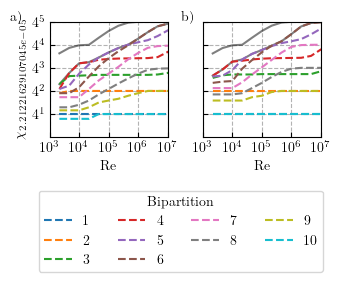

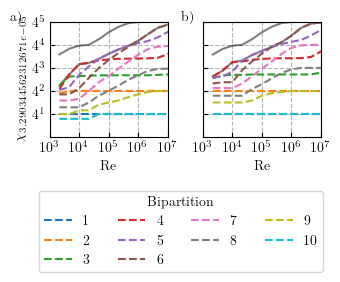

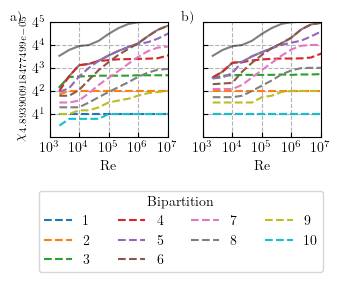

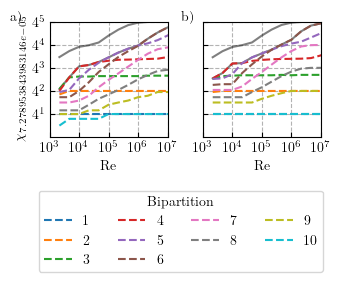

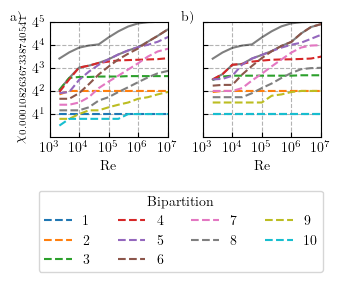

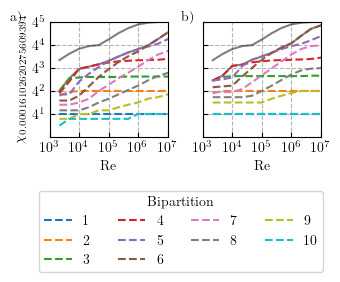

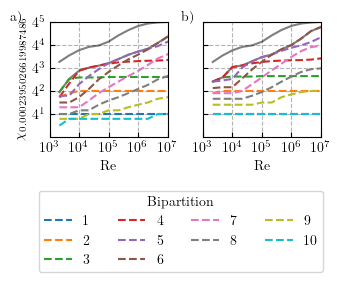

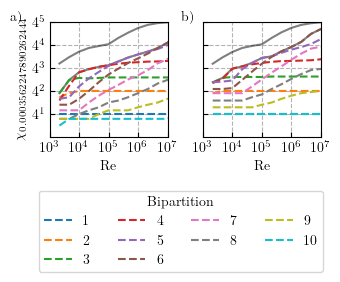

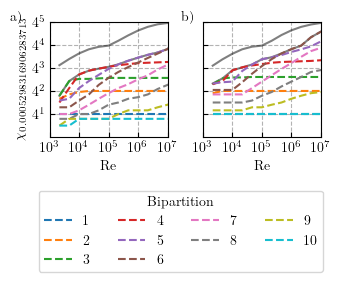

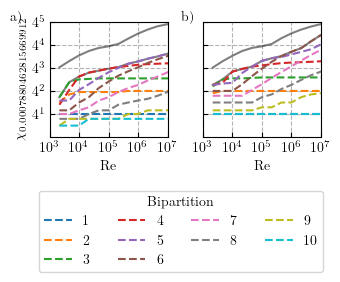

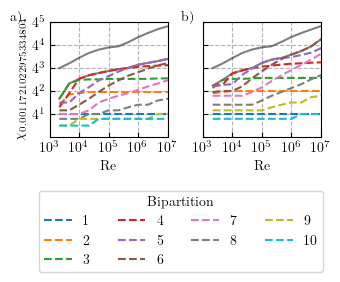

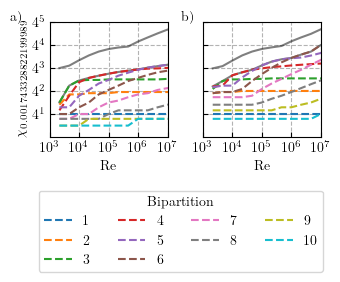

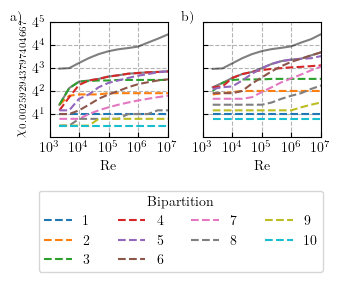

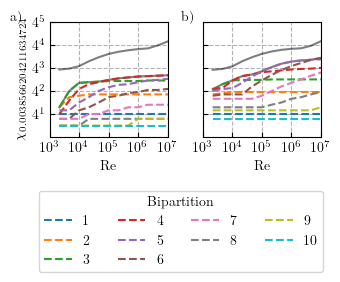

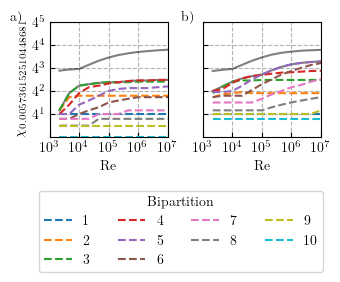

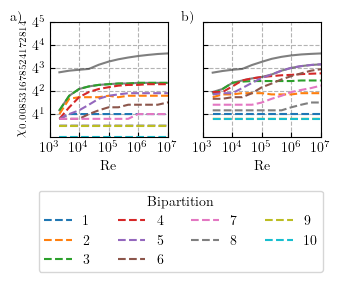

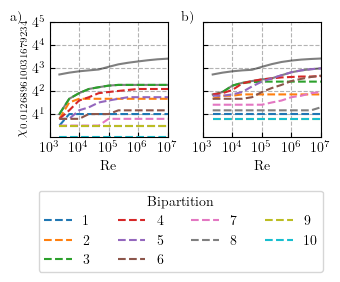

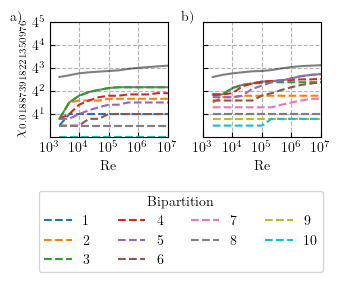

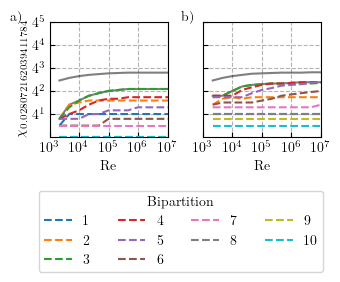

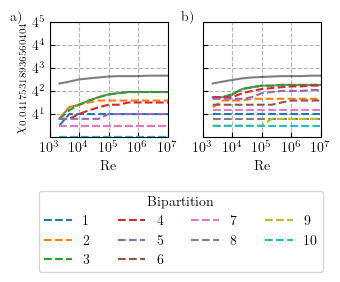

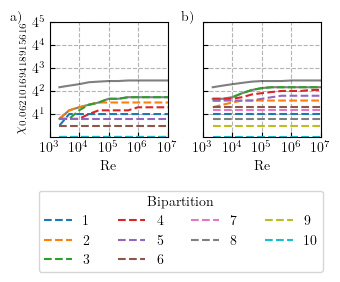

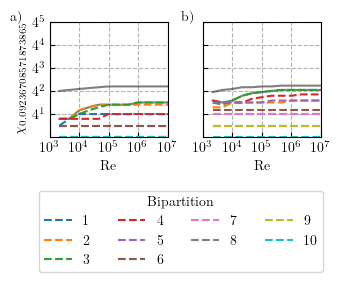

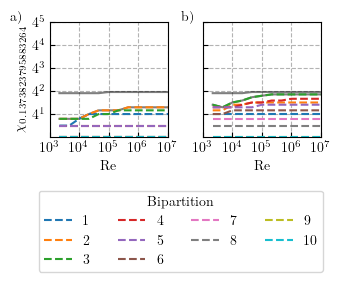

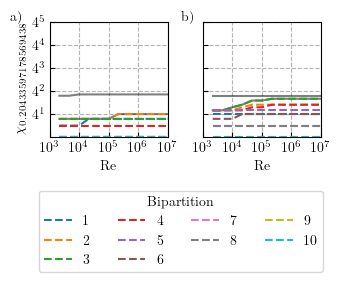

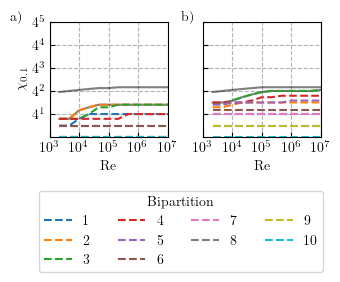

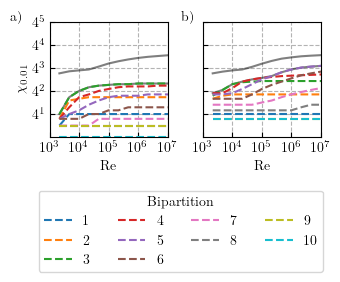

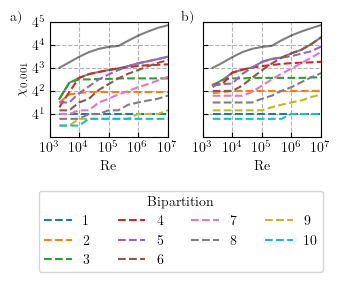

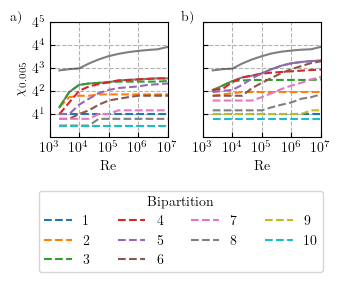

In [9]:
acc_list = []
gamma_list = []
gamma_std_list = []


def eval(acc):
    jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
    random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]

    jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
    jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
    random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
    random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

    fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})
    
    ax[0].plot([x for x, _ in sorted(zip(jet_Re_list, jet_max_chi_u_list))], [x for _, x in sorted(zip(jet_Re_list, jet_max_chi_u_list))], ls='-', marker='', c='black', alpha=0.5)
    for i, chi_bipartition_u in enumerate(jet_chi_bipartitions_u):
        ax[0].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1)
    
    ax[0].plot([x for x, _ in sorted(zip(random_Re_list, random_max_chi_u_list))], [x for _, x in sorted(zip(random_Re_list, random_max_chi_u_list))], ls='-', marker='', c='black', alpha=0.5)
    # for i, chi_bipartition_u in enumerate(random_chi_bipartitions_u):
    #     ax[0].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1)
    
    ax[0].set_xscale('log')
    ax[0].set_yscale('log', base=4)
    ax[0].set_xlabel("Re")
    ylabel = "$\chi_{" + str(acc) + "}$"
    ax[0].set_ylabel(fr"{ylabel}")
    ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
    ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
    ax[0].set_ylim([4**1, 4**5])
    ax[0].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    ax[0].set_yticks([4**1, 4**2, 4**3, 4**4, 4**5])
    ax[0].set_xlim([1e3, 1e7])
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[0].text(-0.1, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
    ax[0].tick_params(which='both', direction="in")

    ax[1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_max_chi_v_list))], [x for _, x in sorted(zip(jet_Re_list, jet_max_chi_v_list))], ls='-', marker='', c='black', alpha=0.5)
    for i, chi_bipartition_v in enumerate(jet_chi_bipartitions_v):
        ax[1].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1)
    
    ax[1].plot([x for x, _ in sorted(zip(random_Re_list, random_max_chi_v_list))], [x for _, x in sorted(zip(random_Re_list, random_max_chi_v_list))], ls='-', marker='', c='black', alpha=0.5)
    # for i, chi_bipartition_v in enumerate(random_chi_bipartitions_v):
    #     ax[1].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1)
    ax[1].set_xscale('log')
    ax[1].set_yscale('log', base=4)
    ax[1].set_xlabel("Re")
    # ax[1].set_ylabel(r"$\chi_{99}$")
    ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
    ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
    # ax[1].set_xlim([10, 1e4])
    ax[1].set_ylim([4**0, 4**5])
    ax[1].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    ax[1].set_yticks([4**1, 4**2, 4**3, 4**4, 4**5])
    ax[1].set_xlim([1e3, 1e7])
    # ax[1].set_yticks([12, 4**2, 4**3])
    # ax[1].set_yticklabels([r'$3\times 4^1$', r'$4^2$', r'$4^3$'])
    # ax[1].set_title("y-component")
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[1].text(0.05, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
    ax[1].tick_params(which='both', direction="in")

    fig.legend(*ax[1].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fancybox=True, title=r'Bipartition')
    fig.tight_layout()
    # plt.savefig(f"{save_path}/chi_Re_{n}_{np.round(float(acc), 15)*1e15}.png", bbox_inches="tight")
    # plt.close()

for acc in jet_chi_Re_acc.keys():
    eval(acc)

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/4223449767.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:
/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/4223449767.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


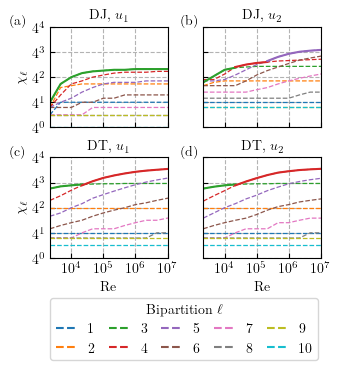

In [10]:
acc = '0.01'

jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]

max_y = 4**4 if max(np.max(random_max_chi_v_list), np.max(random_max_chi_u_list)) < 4**4 else 4**5

jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

fig, ax = plt.subplots(2, 2, figsize=(3.5, 3), sharey=True, sharex=True,  gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# TOP LEFT (0, 0)
for i, chi_bipartition_u in enumerate(jet_chi_bipartitions_u):
    ax[0, 0].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1, lw=0.9)
# ylabel = "$\chi\scriptstyle(\mathrm{Re}, \epsilon=" + str(np.round(float(acc), 2)) + ")$"
ax[0, 0].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_u[2]))], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_u[2]))], ls='-', marker='', c=color_palette[2])
ylabel = "$\chi_\ell$"
ax[0, 0].set_ylabel(fr"{ylabel}")
ax[0, 0].set_title(r"DJ, $u_1$", fontsize=10)
ax[0, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 0].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 0].text(-0.1, 0.9, "(a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# TOP RIGHT (0, 1)
for i, chi_bipartition_v in enumerate(jet_chi_bipartitions_v):
    ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[2]))][:bip_3_end], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[2]))][:bip_3_end], ls='-', marker='', c=color_palette[2])
bip_4_end = 7
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[3]))][bip_3_end-1:bip_4_end], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[3]))][bip_3_end-1:bip_4_end], ls='-', marker='', c=color_palette[3])
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[4]))][bip_4_end-1:], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[4]))][bip_4_end-1:], ls='-', marker='', c=color_palette[4])
ax[0, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 1].set_title(r"DJ, $u_2$", fontsize=10)
ax[0, 1].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 1].text(0.05, 0.9, "(b)", transform=ax[0, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# BOTTOM LEFT (1, 0)
for i, chi_bipartition_u in enumerate(random_chi_bipartitions_u):
    ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_u[2]))][:bip_3_end], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_u[2]))][:bip_3_end], ls='-', marker='', c=color_palette[2])
ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_u[3]))][bip_3_end-1:], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_u[3]))][bip_3_end-1:], ls='-', marker='', c=color_palette[3])
ax[1, 0].set_xlabel(r"$\mathrm{Re}$")
ax[1, 0].set_ylabel(fr"{ylabel}")
ax[1, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 0].set_title(r"DT, $u_1$", fontsize=10)
ax[1, 0].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 0].text(-0.1, 0.9, "(c)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# BOTTOM RIGHT (1, 1)
for i, chi_bipartition_v in enumerate(random_chi_bipartitions_v):
    ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_v[2]))][:bip_3_end], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_v[2]))][:bip_3_end], ls='-', marker='', c=color_palette[2])
ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_v[3]))][bip_3_end-1:], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_v[3]))][bip_3_end-1:], ls='-', marker='', c=color_palette[3])
ax[1, 1].set_xlabel(r"$\mathrm{Re}$")
ax[1, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 1].set_title(r"DT, $u_2$", fontsize=10)
ax[1, 1].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 1].text(0.05, 0.9, "(d)", transform=ax[1, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# GENERAL SETTINGS
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log', base=4)
ax[0, 0].set_ylim([4**0, max_y])
y_ticks = [4**n for n in range(int(np.emath.logn(4, max_y))+1)]
ax[0, 0].set_yticks(y_ticks)
ax[0, 0].set_xlim([2.1e3, 1e7])
ax[0, 0].set_xticks([1e4, 1e5, 1e6, 1e7])
# ax[0, 0].set_xticks([1e4, 1e6], minor=True, labels=[""]*2)
leg = fig.legend(*ax[0, 1].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.51, -0.0), ncol=5, fancybox=True, title=r'Bipartition $\ell$', handlelength=1.5, columnspacing=1)#, handletextpad=0.2)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)
plt.savefig(f"chi_Re_{np.round(float(acc), 10)}.pdf", bbox_inches="tight")
fig.tight_layout()

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/4174742755.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:
/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_13095/4174742755.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


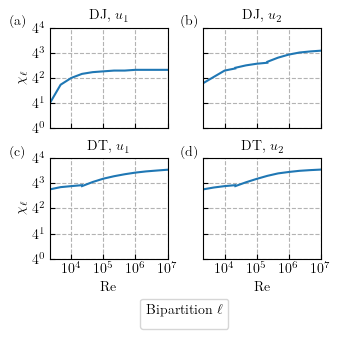

In [11]:
acc = '0.01'

jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]

max_y = 4**4 if max(np.max(random_max_chi_v_list), np.max(random_max_chi_u_list)) < 4**4 else 4**5

jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

fig, ax = plt.subplots(2, 2, figsize=(3.5, 3), sharey=True, sharex=True,  gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# TOP LEFT (0, 0)
# for i, chi_bipartition_u in enumerate(jet_chi_bipartitions_u):
#     ax[0, 0].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1, lw=0.9)
# ylabel = "$\chi\scriptstyle(\mathrm{Re}, \epsilon=" + str(np.round(float(acc), 2)) + ")$"
ax[0, 0].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_u[2]))], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_u[2]))], ls='-', marker='', c=color_palette[0])
ylabel = "$\chi_\ell$"
ax[0, 0].set_ylabel(fr"{ylabel}")
ax[0, 0].set_title(r"DJ, $u_1$", fontsize=10)
ax[0, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 0].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 0].text(-0.1, 0.9, "(a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# TOP RIGHT (0, 1)
# for i, chi_bipartition_v in enumerate(jet_chi_bipartitions_v):
#     ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[2]))][:bip_3_end], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[2]))][:bip_3_end], ls='-', marker='', c=color_palette[0])
bip_4_end = 7
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[3]))][bip_3_end-1:bip_4_end], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[3]))][bip_3_end-1:bip_4_end], ls='-', marker='', c=color_palette[0])
ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[4]))][bip_4_end-1:], [x for _, x in sorted(zip(jet_Re_list, jet_chi_bipartitions_v[4]))][bip_4_end-1:], ls='-', marker='', c=color_palette[0])
ax[0, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[0, 1].set_title(r"DJ, $u_2$", fontsize=10)
ax[0, 1].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0, 1].text(0.05, 0.9, "(b)", transform=ax[0, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# BOTTOM LEFT (1, 0)
# for i, chi_bipartition_u in enumerate(random_chi_bipartitions_u):
#     ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_u))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_u[2]))][:bip_3_end], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_u[2]))][:bip_3_end], ls='-', marker='', c=color_palette[0])
ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_u[3]))][bip_3_end-1:], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_u[3]))][bip_3_end-1:], ls='-', marker='', c=color_palette[0])
ax[1, 0].set_xlabel(r"$\mathrm{Re}$")
ax[1, 0].set_ylabel(fr"{ylabel}")
ax[1, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 0].set_title(r"DT, $u_1$", fontsize=10)
ax[1, 0].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 0].text(-0.1, 0.9, "(c)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# BOTTOM RIGHT (1, 1)
# for i, chi_bipartition_v in enumerate(random_chi_bipartitions_v):
#     ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_v))], ls='--', marker='', label=i+1, lw=0.9)
bip_3_end = 4
ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_v[2]))][:bip_3_end], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_v[2]))][:bip_3_end], ls='-', marker='', c=color_palette[0])
ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, random_chi_bipartitions_v[3]))][bip_3_end-1:], [x for _, x in sorted(zip(random_Re_list, random_chi_bipartitions_v[3]))][bip_3_end-1:], ls='-', marker='', c=color_palette[0])
ax[1, 1].set_xlabel(r"$\mathrm{Re}$")
ax[1, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
ax[1, 1].set_title(r"DT, $u_2$", fontsize=10)
ax[1, 1].tick_params(which='both', direction="in")
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1, 1].text(0.05, 0.9, "(d)", transform=ax[1, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

# GENERAL SETTINGS
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log', base=4)
ax[0, 0].set_ylim([4**0, max_y])
y_ticks = [4**n for n in range(int(np.emath.logn(4, max_y))+1)]
ax[0, 0].set_yticks(y_ticks)
ax[0, 0].set_xlim([2.1e3, 1e7])
ax[0, 0].set_xticks([1e4, 1e5, 1e6, 1e7])
# ax[0, 0].set_xticks([1e4, 1e6], minor=True, labels=[""]*2)
leg = fig.legend(*ax[0, 1].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.51, -0.0), ncol=5, fancybox=True, title=r'Bipartition $\ell$', handlelength=1.5, columnspacing=1)#, handletextpad=0.2)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)
plt.savefig(f"chi_Re_{np.round(float(acc), 10)}_top.pdf", bbox_inches="tight")
fig.tight_layout()

In [30]:
def find_index(list, Re):
    index = None
    for i, Re_num in enumerate(list):
        if Re_num == Re:
            index = i
    
    return index

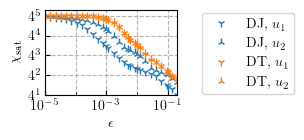

In [31]:
err_list = []
jet_max_chi_u = []
jet_max_chi_v = []
random_max_chi_u = []
random_max_chi_v = []

for acc in jet_chi_Re_acc.keys():
    jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
    random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]

    jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
    jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
    random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
    random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

    err_list.append(float(acc))
    jet_max_chi_u.append(jet_max_chi_u_list[find_index(jet_Re_list, 1e7)])
    jet_max_chi_v.append(jet_max_chi_v_list[find_index(jet_Re_list, 1e7)])
    random_max_chi_u.append(random_max_chi_u_list[find_index(random_Re_list, 1e7)])
    random_max_chi_v.append(random_max_chi_v_list[find_index(random_Re_list, 1e7)])

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

err_DJ_x = [x for x, _ in sorted(zip(err_list, jet_max_chi_u))]
chi_DJ_x = [x for _, x in sorted(zip(err_list, jet_max_chi_u))]
err_DJ_y = [x for x, _ in sorted(zip(err_list, jet_max_chi_v))]
chi_DJ_y = [x for _, x in sorted(zip(err_list, jet_max_chi_v))]
err_DT_x = [x for x, _ in sorted(zip(err_list, random_max_chi_u))]
chi_DT_x = [x for _, x in sorted(zip(err_list, random_max_chi_u))]
err_DT_y = [x for x, _ in sorted(zip(err_list, random_max_chi_v))]
chi_DT_y = [x for _, x in sorted(zip(err_list, random_max_chi_v))]

fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))
ax.plot(err_DJ_x, chi_DJ_x, c=colors[0], ls='', label=r"DJ, $u_1$", marker="1")
ax.plot(err_DJ_y, chi_DJ_y, c=colors[0], ls="", label=r"DJ, $u_2$", marker="2")#ls=(0, (5, 1)))
ax.plot(err_DT_x, chi_DT_x, c=colors[1], ls='', label=r"DT, $u_1$", marker="1")
ax.plot(err_DT_y, chi_DT_y, c=colors[1], ls="", label=r"DT, $u_2$", marker="2")#ls=(0, (5, 1)))
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_u))], [x for _, x in sorted(zip(err_list, jet_max_chi_u))], c=colors[0], ls=(0, (3, 5, 1, 5, 1, 5)), label="DJ (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_v))], [x for _, x in sorted(zip(err_list, jet_max_chi_v))], c=colors[0], ls="dotted", label="DJ (y)")#ls=(0, (5, 1)))
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_u))], [x for _, x in sorted(zip(err_list, random_max_chi_u))], c=colors[1], ls=(0, (3, 5, 1, 5, 1, 5)), label="DT (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_v))], [x for _, x in sorted(zip(err_list, random_max_chi_v))], c=colors[1], ls="dotted", label="DT (y)")#ls=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log', base=4)
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\chi_\mathrm{sat}$")
ax.xaxis.grid(True, which="both", ls="--", c='0.7')
ax.yaxis.grid(True, which="both", ls="--", c='0.7')
ax.set_ylim([4**1, 1.5*4**5])
ax.set_xticks([1e-1, 1e-3, 1e-5])
ax.set_xticks([1e-2, 1e-4], minor=True, labels=[""]*2)
ax.set_yticks([4**1, 4**2, 4**3, 4**4, 4**5])
ax.set_xlim([1e-5, 2e-1])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0].text(-0.1, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax.tick_params(which='both', direction="in")
# handles, labels = ax[1].get_legend_handles_labels()
fig.legend(*ax.get_legend_handles_labels(), loc='center left', bbox_to_anchor=(1, 0.61), ncol=1, fancybox=True)
fig.tight_layout()
plt.savefig("chi_sat_err.pdf", bbox_inches="tight")
plt.show()

In [32]:
def poly(x, A, B):
    x = np.array(x)
    y = A*(1/x)**B
    return y

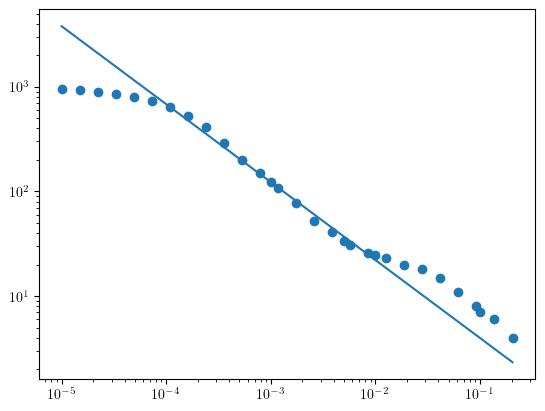

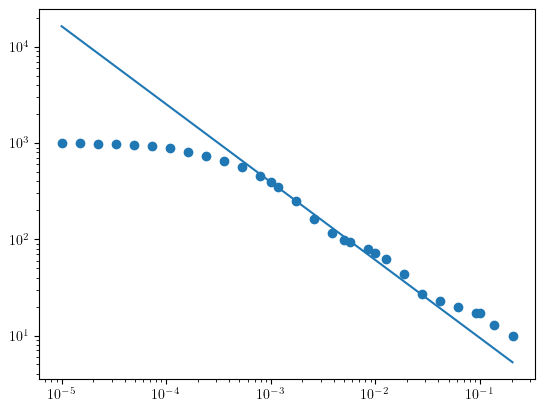

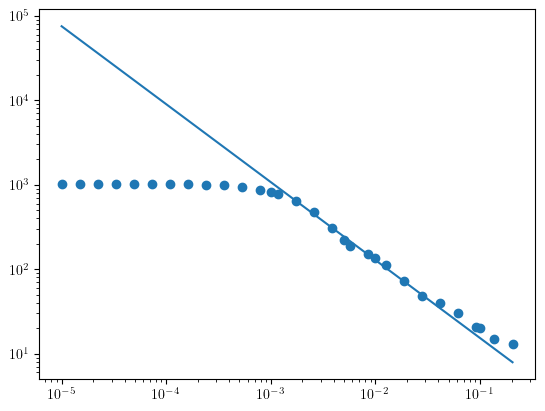

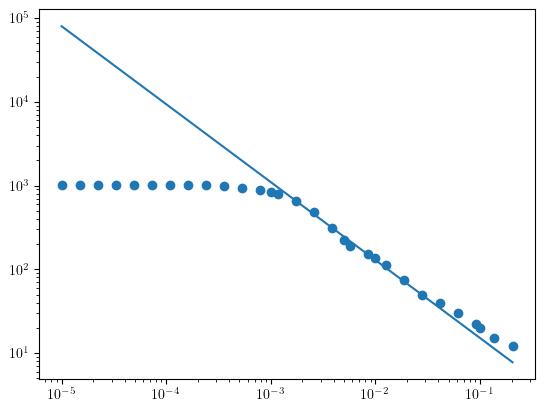

In [33]:
params, cov = curve_fit(poly, err_DJ_x[10:], chi_DJ_x[10:])
A_DJ_x = params[0]
B_DJ_x = params[1]
std_DJ_x = np.sqrt(np.diag(cov))[0]
std_DJ_x = np.sqrt(np.diag(cov))[1]
plt.scatter(err_DJ_x, chi_DJ_x)
plt.loglog(err_DJ_x, poly(err_DJ_x, A_DJ_x, B_DJ_x))
plt.show()

params, cov = curve_fit(poly, err_DJ_y[12:], chi_DJ_y[12:])
A_DJ_y = params[0]
B_DJ_y = params[1]
std_DJ_y = np.sqrt(np.diag(cov))[0]
std_DJ_y = np.sqrt(np.diag(cov))[1]
plt.scatter(err_DJ_y, chi_DJ_y)
plt.loglog(err_DJ_y, poly(err_DJ_y, A_DJ_y, B_DJ_y))
plt.show()

params, cov = curve_fit(poly, err_DT_x[14:], chi_DT_x[14:])
A_DT_x = params[0]
B_DT_x = params[1]
std_DT_x = np.sqrt(np.diag(cov))[0]
std_DT_x = np.sqrt(np.diag(cov))[1]
plt.scatter(err_DT_x, chi_DT_x)
plt.loglog(err_DT_x, poly(err_DT_x, A_DT_x, B_DT_x))
plt.show()

params, cov = curve_fit(poly, err_DT_y[14:], chi_DT_y[14:])
A_DT_y = params[0]
B_DT_y = params[1]
std_DT_y = np.sqrt(np.diag(cov))[0]
std_DT_y = np.sqrt(np.diag(cov))[1]
plt.scatter(err_DT_y, chi_DT_y)
plt.loglog(err_DT_y, poly(err_DT_y, A_DT_y, B_DT_y))
plt.show()

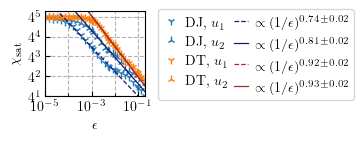

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.5))
ax.plot(err_DJ_x, chi_DJ_x, c=colors[0], ls='', label=r"DJ, $u_1$", marker="1")
ax.plot(err_DJ_y, chi_DJ_y, c=colors[0], ls="", label=r"DJ, $u_2$", marker="2")#ls=(0, (5, 1)))
ax.plot(err_DT_x, chi_DT_x, c=colors[1], ls='', label=r"DT, $u_1$", marker="1")
ax.plot(err_DT_y, chi_DT_y, c=colors[1], ls="", label=r"DT, $u_2$", marker="2")#ls=(0, (5, 1)))
label_DJ_x = "$\propto(1/\epsilon)^{"+f"{np.round(B_DJ_x, 2)}\pm{np.round(std_DJ_x, 2)}"+"}$"
label_DJ_y = "$\propto(1/\epsilon)^{"+f"{np.round(B_DJ_y, 2)}\pm{np.round(std_DJ_y, 2)}"+"}$"
label_DT_x = "$\propto(1/\epsilon)^{"+f"{np.round(B_DT_x, 2)}\pm{np.round(std_DT_x, 2)}"+"}$"
label_DT_y = "$\propto(1/\epsilon)^{"+f"{np.round(B_DT_y, 2)}\pm{np.round(std_DT_y, 2)}"+"}$"
ax.plot(err_DJ_x, poly(err_DJ_x, A_DJ_x, B_DJ_x), c="midnightblue", ls='--', label=label_DJ_x, lw=0.9)
ax.plot(err_DJ_y, poly(err_DJ_y, A_DJ_y, B_DJ_y), c="midnightblue", ls='-', label=label_DJ_y, lw=0.9)
ax.plot(err_DJ_y, poly(err_DT_x, A_DT_x, B_DT_x), c="brown", ls='--', label=label_DT_x, lw=0.9)
ax.plot(err_DJ_y, poly(err_DT_y, A_DT_y, B_DT_y), c="brown", ls='-', label=label_DT_y, lw=0.9)
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_u))], [x for _, x in sorted(zip(err_list, jet_max_chi_u))], c=colors[0], ls=(0, (3, 5, 1, 5, 1, 5)), label="DJ (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_v))], [x for _, x in sorted(zip(err_list, jet_max_chi_v))], c=colors[0], ls="dotted", label="DJ (y)")#ls=(0, (5, 1)))
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_u))], [x for _, x in sorted(zip(err_list, random_max_chi_u))], c=colors[1], ls=(0, (3, 5, 1, 5, 1, 5)), label="DT (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_v))], [x for _, x in sorted(zip(err_list, random_max_chi_v))], c=colors[1], ls="dotted", label="DT (y)")#ls=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log', base=4)
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\chi_\mathrm{sat}$")
ax.xaxis.grid(True, which="both", ls="--", c='0.7')
ax.yaxis.grid(True, which="both", ls="--", c='0.7')
ax.set_ylim([4**1, 1.5*4**5])
ax.set_xticks([1e-1, 1e-3, 1e-5])
ax.set_xticks([1e-2, 1e-4], minor=True, labels=[""]*2)
ax.set_yticks([4**1, 4**2, 4**3, 4**4, 4**5])
ax.set_xlim([1e-5, 2e-1])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0].text(-0.1, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax.tick_params(which='both', direction="in")
# handles, labels = ax[1].get_legend_handles_labels()
fig.legend(*ax.get_legend_handles_labels(), loc='center left', bbox_to_anchor=(0.92, 0.61), ncol=2, fancybox=True, columnspacing=0.5, handlelength=1, handletextpad=0.5)
fig.tight_layout()
plt.savefig("chi_sat_err.pdf", bbox_inches="tight")
plt.show()